# Technical Report- PWM Testing
11/10/25

# Part 1
## Methods/Data Collection

Using DC power supply and oscilloscope we seek to verify and ensure the accuracy of two primary quantities: the duty cycle values corresponding to different voltage inputs in the AIN0 channel and the linear mapping (how well these data points correspond to a line with an equation $y= \frac{1}{3}x$).  We will prove the accuracy of the duty cycle percentages using traditional statistical methods such as calculating the 95% confidence interval and compare the experimental values to the actual values. On the other hand, in order to verify the linear mapping, we will use a linear regression along with the sampled data points. In order to make these calculations, a data table was created using the gathered data generated by measuring the duty cycle % given 4 different voltage input levels from the DC power supply to the AIN0 channel (0V, 1V, 1.5V, 2.0V, and 3.0V).  In order to obtain the data, the oscilloscope was used to verify the implemented logging statements to ensure their accuracy. After this verifiction, logging statements were used to determine the experimental duty cycle (along with qualitative inspection to note brightness changes).

## Results

Loading in the generated .csv file. Note that 4 samples were taken for each voltage.

In [81]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the data

logging_data = pd.read_csv('PWM_part1.csv')

#reading the head of the dataframe
logging_data.head(10)


,Volts,Experimental Duty Cycle (%),Actual Duty Cycle (%)
0,0.0,0.00,0.00
1,0.0,0.00,0.00
2,0.0,0.00,0.00
3,0.0,0.00,0.00
4,1.0,33.16,33.33
5,1.0,33.10,33.33
6,1.0,33.10,33.33
7,1.0,33.16,33.33
8,1.5,49.93,50.00
9,1.5,50.00,50.00


## Data analysis for duty cycle accuracy

Deriving basic statistics for the experimental duty cycle values (mean, std, min, etc.)

In [82]:
logging_data.groupby('Actual Duty Cycle (%)')['Experimental Duty Cycle (%)'].describe()

,count,mean,std,min,25%,50%,75%,max
Actual Duty Cycle (%),,,,,,,,
0.00,4.0,0.0000,0.000000,0.00,0.0000,0.000,0.0000,0.00
33.33,4.0,33.1300,0.034641,33.10,33.1000,33.130,33.1600,33.16
50.00,4.0,49.8825,0.099457,49.80,49.8000,49.865,49.9475,50.00
66.66,4.0,66.5425,0.071822,66.47,66.4925,66.535,66.5850,66.63
100.00,4.0,99.9525,0.015000,99.93,99.9525,99.960,99.9600,99.96


### How to Calculate 95% Confidence Interval for a Mean
Performing a confidence interval to determine the precision of our experimental values

In [83]:
# calculate the 95% confidence intervals
confidence_interval = logging_data.groupby('Actual Duty Cycle (%)')['Experimental Duty Cycle (%)'].apply(
    lambda x: sp.stats.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=sp.stats.sem(x))
)
print(confidence_interval)

Actual Duty Cycle (%)
0.00                                  (nan, nan)
33.33     (33.07487841306888, 33.18512158693111)
50.00      (49.72424194435391, 50.0407580556461)
66.66     (66.42821590573593, 66.65678409426405)
100.00    (99.92863165271038, 99.97636834728962)
Name: Experimental Duty Cycle (%), dtype: object


/Users/jea8802/anaconda3/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/Users/jea8802/anaconda3/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


## Linear Regression for AIN0 and Blink Frequency
Now we will be performing a linear regression to determine behavior of duty cycle % vs the amount of voltage applied to the AIN0 channel. Note that we will be using 1.0, 1.5, 2.0, and 3.0V as reference points.

In [84]:
#recall the data table from above
file_path = 'PWM_part1.csv'
data = pd.read_csv(file_path)
data.head(10)

,Volts,Experimental Duty Cycle (%),Actual Duty Cycle (%)
0,0.0,0.00,0.00
1,0.0,0.00,0.00
2,0.0,0.00,0.00
3,0.0,0.00,0.00
4,1.0,33.16,33.33
5,1.0,33.10,33.33
6,1.0,33.10,33.33
7,1.0,33.16,33.33
8,1.5,49.93,50.00
9,1.5,50.00,50.00


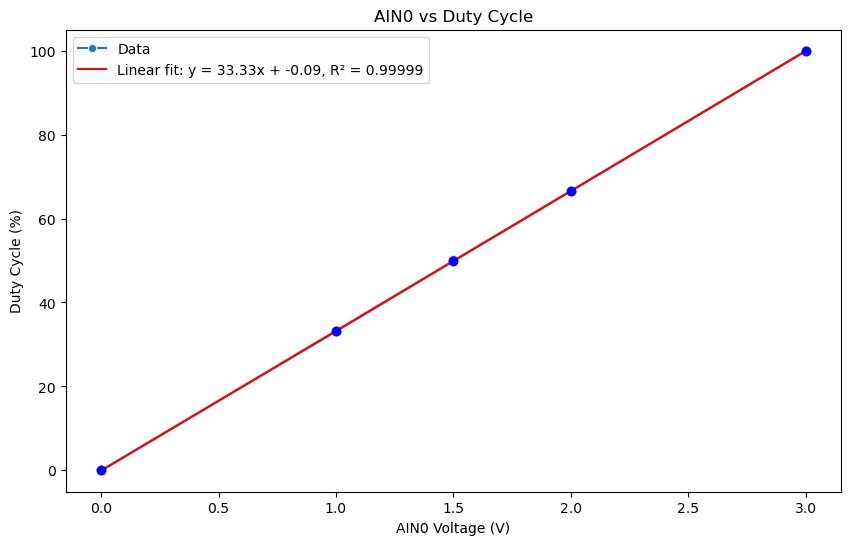

In [85]:
#now performing linear regression
from bme554 import plot_with_fit

file_path = 'PWM_part1.csv'
data = pd.read_csv(file_path)

# Plotting for AIN0 vs Blink Rate
plot_with_fit(data['Volts'], data['Experimental Duty Cycle (%)'], 'AIN0 Voltage (V)', 'Duty Cycle (%)', 'AIN0 vs Duty Cycle')


In [86]:
#calculating confidence intervals
from bme554 import calculate_confidence_intervals

# Calculate and print confidence intervals for AIN0 vs Blink Rate
slope_ci, intercept_ci = calculate_confidence_intervals(data['Volts'], data['Experimental Duty Cycle (%)'])
print(f'AIN0 vs Blink Rate:\nSlope CI: [{slope_ci[0]:.4f} - {slope_ci[1]:.4f}]\nIntercept CI: [{intercept_ci[0]:.4f} - {intercept_ci[1]:.4f}]\n')


AIN0 vs Blink Rate:
Slope CI: [33.2847 - 33.3693]
Intercept CI: [-0.1060 - -0.0720]



## Conclusions for Linear Regression

The small 95% confidence intervals and close proximity to the actual duty cycle values indicate that our output is accurate. The small standard deviation demonstrates that our experiment is reproducible, confirming that the PWM is modulating correctly across different voltage inputs with synchronous ADC readings.

In terms of the linear regression, we also receive positive results. The intercept shows a slight offset from the expected (0,0) origin, likely due to the limited decimal resolution of the 33.33% and 66.67% duty cycle values. Testing without these intermediate values might yield an even better fit. However, the current linear relationship closely approximates the theoretical equation $y = \frac{1}{3}x$, with an $R^2$ value approaching 100%. The narrow confidence intervals for both the intercept and slope further confirm the consistency and reliability of our data.


# PWM Part 2: Sinusoidal Modulation of PWM Output

For this experiment, we selected a 10 Hz input signal with Vpp = 2V and used an oscilloscope in conjunction with a low-pass filter to compare the input signal from a function waveform generator to a PWM output signal generated by our board. To accurately represent the full 0-100% duty cycle range, we implemented a linear mapping function that converted the input voltage range of -1V to +1V into a duty cycle range, with $V_{pp} = 2$ (however, we did define the max and min voltages using macros for flexibility). Additionally, we configured the system to generate a PWM pulse based on every fifth ADC asynchronous reading to balance sampling frequency with processing efficiency.

In order to characterize the system's performance, we measured the latency between the input and output signals by centering the input signal around zero on the oscilloscope, shifting the PWM output signal down to align with zero, and inverting it to account for the active-low configuration of the LEDs. The phase shift between the two signals was then calculated in milliseconds to quantify the delay introduced by the ADC sampling and PWM generation process. Finally, we determined the frequency of the output signal to verify that the 10 Hz input frequency was accurately reproduced through the PWM output.

In [87]:
# Load the data

df = pd.read_csv('PWM_part2.csv')

#reading the head of the dataframe
df.head(20)

,Time(s),Input signal (V),PWM LPF (V),PWM LPF shifted (V),PWM LPF inverted (V)
0,-0.13350,-0.410679,1.574729,0.074729,-0.074729
1,-0.13325,-0.450879,1.589244,0.089244,-0.089244
2,-0.13300,-0.450879,1.603760,0.103760,-0.103760
3,-0.13275,-0.450879,1.618275,0.118275,-0.118275
4,-0.13250,-0.491080,1.632790,0.132790,-0.132790
5,-0.13225,-0.491080,1.646927,0.146927,-0.146927
6,-0.13200,-0.491080,1.661012,0.161012,-0.161012
7,-0.13175,-0.491080,1.675097,0.175097,-0.175097
8,-0.13150,-0.531281,1.689509,0.189509,-0.189509
9,-0.13125,-0.531281,1.704025,0.204025,-0.204025


## Plotting both the input and output signal

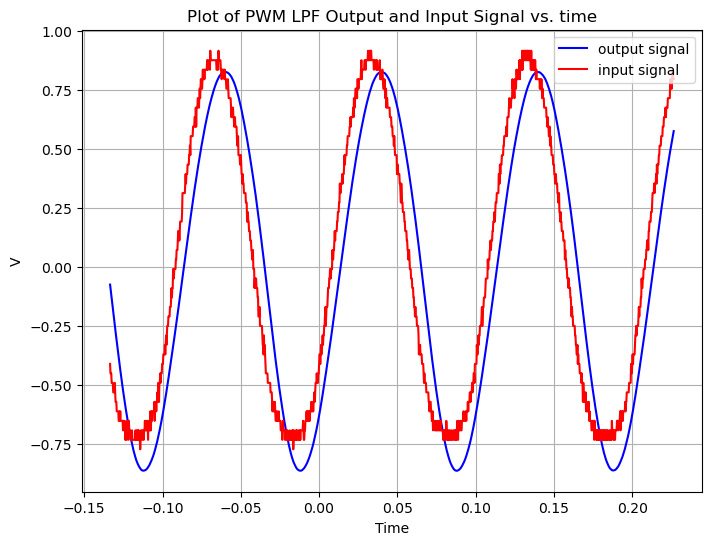

In [88]:
#now plotting both the input and output (PWM LPF) signals 
plt.figure(figsize=(8, 6))

PWM = plt.plot(df['Time(s)'], df['PWM LPF inverted (V)'], color='blue', label = 'output signal')
input = plt.plot(df['Time(s)'], df['Input signal (V)'], c='r', label = 'input signal')

plt.title('Plot of PWM LPF Output and Input Signal vs. time')
plt.xlabel('Time')
plt.ylabel('V')
plt.legend()
plt.grid(True)
plt.show()

## Finding the Phase Shift

Note that we determine the phase shift given a given threshold line (i.e where both signals cross a certain $y= \text{constant}$ line, in this case we set it at $y=0$). These threshold crossings are then determined in terms of both time and voltage and are then refined for accuracy. The refined values are then used to linearly interpolate the crossing times for both the input and output signals. The phase shift is finally determined by subtracting the output signal crossing time from the input signal crossing time. Note that since our time values begin in the negative range (output given by oscilloscope), our phase shift value is also negative. We are just observing the magnitude of the phase shift, so this is acceptable in our case (it is also possible to shift our index to make the time begin at 0).

In [89]:
#Listing both signals and time columns
y_pwm = df['PWM LPF inverted (V)']
y_actual = df['Input signal (V)']
time = df['Time(s)']

#Set reference threshold to calculate phase shift
threshold = 0

#Find where signals cross the threshold and making function definition
def find_crossing(time, signal, threshold):
    # Find where signal crosses threshold going upward
    crossings = np.where(np.diff(np.sign(signal - threshold)) > 0)[0]
    if len(crossings) > 0:

    #refining the values and generating voltage and time values according to the index values
        idx = crossings[0]
        t1, t2 = time[idx], time[idx + 1]
        y1, y2 = signal[idx], signal[idx + 1]
        
    #now we linearly interpolate
        crossing_time = t1 + (threshold - y1) * (t2 - t1) / (y2 - y1)
        return crossing_time, idx
    return None, None

#Find crossings for both signals- applying function definition from above
t_pwm, idx_pwm = find_crossing(time, y_pwm, threshold)
t_actual, idx_actual = find_crossing(time, y_actual, threshold)

#now determining phase shift
if t_pwm is None or t_actual is None:
    print("Could not find crossings")
else:
    phase_shift = t_actual - t_pwm
    print(f"PWM LPF output signal crosses {threshold}V at: {t_pwm:.6f} seconds")
    print(f"Input signal crosses {threshold}V at: {t_actual:.6f} seconds")
    print(f"Phase shift (delay): {phase_shift:.6f} seconds ({phase_shift*1000:.3f} ms)")

PWM LPF output signal crosses 0V at: -0.086347 seconds
Input signal crosses 0V at: -0.091696 seconds
Phase shift (delay): -0.005349 seconds (-5.349 ms)


To visually analyze the phase shift, we will plot the time crossings for our threshold (0 in this case) as well as the horizontal threshold line.

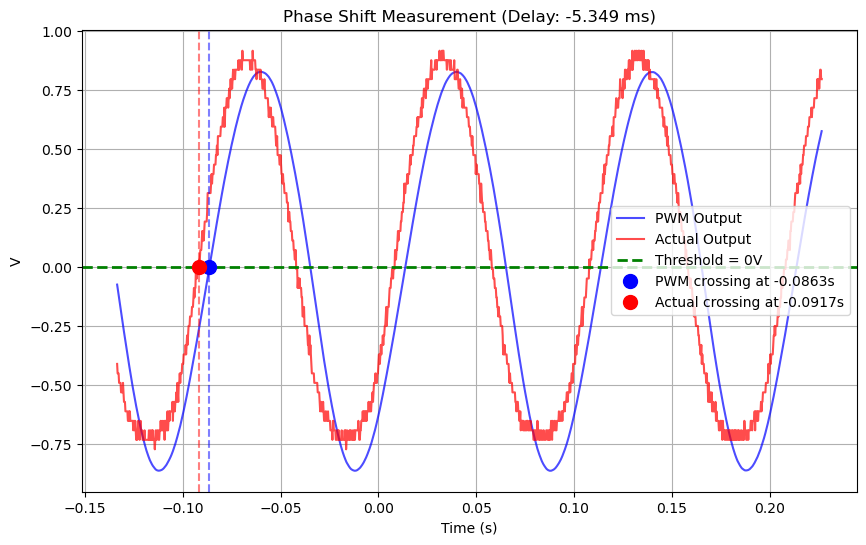

In [90]:
#Now we plot
plt.figure(figsize=(10, 6))
plt.plot(time, y_pwm, color='blue', label='PWM Output', alpha=0.7)
plt.plot(time, y_actual, color='red', label='Actual Output', alpha=0.7)

#Plot threshold line
plt.axhline(y=threshold, color='green', linestyle='--', linewidth=2, label=f'Threshold = {threshold}V')

#Mark crossing points and plot vertical lines
if t_pwm is not None:
    plt.plot(t_pwm, threshold, 'bo', markersize=10, label=f'PWM crossing at {t_pwm:.4f}s')
    plt.axvline(x=t_pwm, color='blue', linestyle='--', alpha=0.5)

if t_actual is not None:
    plt.plot(t_actual, threshold, 'ro', markersize=10, label=f'Actual crossing at {t_actual:.4f}s')
    plt.axvline(x=t_actual, color='red', linestyle='--', alpha=0.5)
    
plt.title(f'Phase Shift Measurement (Delay: {phase_shift*1000:.3f} ms)')
plt.xlabel('Time (s)')
plt.ylabel('V')
plt.legend()
plt.grid(True)
plt.show()

## Verifying the 10Hz frequency

Both the input signal and PWM LPF output will be graphed along with a horizontal line at y = 0 to visually compare the signals and verify that the PWM filter correctly processed the input.

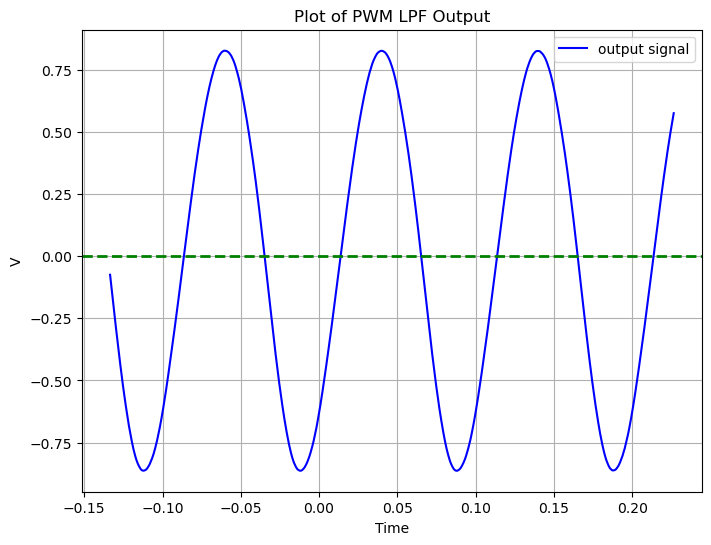

In [91]:
#now only showing the pwm output graph
#now plotting both the input and output (PWM LPF) signals 
plt.figure(figsize=(8, 6))

PWM = plt.plot(df['Time(s)'], df['PWM LPF inverted (V)'], color='blue', label = 'output signal')
plt.axhline(y=0, color='green', linestyle='--', linewidth=2)


plt.title('Plot of PWM LPF Output')
plt.xlabel('Time')
plt.ylabel('V')
plt.legend()
plt.grid(True)
plt.show()

Now we will calcualate the frequency of the signal by finding the period using the zero crossings and taking the reciprocal to find the frequency.

In [92]:
volts = df['PWM LPF inverted (V)'].values
time = df['Time(s)'].values

#finding zero crossings
zero_crossings_idx = np.where(np.diff(np.sign(volts)))[0]

#Get crossing times
zero_crossings_time_simple = time[zero_crossings_idx]

#Remove NaNs
zero_crossings_time_clean = zero_crossings_time_simple[~np.isnan(zero_crossings_time_simple)]
zero_crossings_time_clean = zero_crossings_time_clean[:-1]

print("Zero crossing times (in s):")
print(zero_crossings_time_clean)

#Calculating the frequency frequency
if len(zero_crossings_time_clean) > 1:
    periods = np.diff(zero_crossings_time_clean) * 2 
    frequency = 1 / np.mean(periods)
    print(f"\nPWM Signal Frequency: {frequency:.2f} Hz")

Zero crossing times (in s):
[-0.0865 -0.035   0.0135  0.065   0.1135  0.165   0.2135]

PWM Signal Frequency: 10.00 Hz


## Conclusions for sinusoidal PWM

In this experiment, we used an oscilloscope and waveform generator to compare an input signal (10 Hz sine wave, Vpp = 2V) to a PWM signal generated by asynchronous ADC readings and filtered through a low-pass filter. Analysis of the zero-crossing points revealed a phase shift of -5.349 ms between the input and output signals, indicating a small latency in the system. This delay can be attributed to our sampling and processing approach as we updated the PWM pulse once for every 5 asynchronous ADC samples to improve computational efficiency. To reduce this latency, we could decrease the number of ADC samples required before each PWM update. During the experiment, we observed that the shape and consistency of the output sine wave strongly correlated with the PWM update frequency since higher update rates produced smoother, more accurate waveforms. Other improvements could include adjusting the LPF bandwidth to optimize filtering performance. Additionally, the structure of the code could also be altered by reduce what is placed into the adc async callback function to minimize blocking and ensure the samples are collected as quickly as possible.  

Finally, we calculated the output signal frequency using zero-crossing detection to determine the period, then took the reciprocal. The measured frequency was 10.00 Hz, matching the input frequency and confirming that the signal was correctly processed.